In [1]:
import numpy as np
from pynq import Overlay, allocate
import matplotlib.pyplot as plt
from PIL import Image

In [46]:
overlay = Overlay("/home/xilinx/jupyter_notebooks/dy_max_pool/dy_max_pool.bit")
overlay.ip_dict.keys()

dict_keys(['dy_max_pool_0', 'axi_intc_0', 'processing_system7_0'])

In [59]:
img_height = 28
img_width = 28
kern_sz = 2
out_height = img_height/kern_sz
out_width = img_width/kern_sz

In [57]:
image_path = "/home/xilinx/jupyter_notebooks/dy_max_pool/Row1.png"
image = Image.open(image_path)
bw_image = image.convert('L')
ip_image = np.array(bw_image,dtype=np.float32).flatten()

in_buff = allocate(shape=(28*28,), dtype=np.float32)
out_buff = allocate(shape=(14*14,),dtype=np.float32)
np.copyto(in_buff,ip_image)
print(in_buff)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.   0.
   0. 

In [48]:
# ip_image = np.zeros((img_height* img_width), dtype=np.float32)
# for i in range(img_height):
#     for j in range(img_width):
#         ip_image[i*img_width+j] = i * img_width + j

# in_buff = allocate(shape=(img_height*img_width,), dtype=np.float32)
# out_buff = allocate(shape=(2*2,),dtype=np.float32)
# np.copyto(in_buff,ip_image)

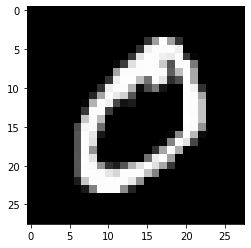

In [60]:
plt.imshow(in_buff.reshape(img_height,img_width),cmap="gray")
plt.show()

In [61]:
my_ip = overlay.dy_max_pool_0
reg_map = my_ip.register_map
reg_map

RegisterMap {
  CTRL = Register(AP_START=1, AP_DONE=0, AP_IDLE=0, AP_READY=0, RESERVED_1=0, AUTO_RESTART=1, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0),
  img_height = Register(img_height=write-only),
  img_width = Register(img_width=write-only),
  kernel_size = Register(kernel_size=write-only),
  input_r_1 = Register(input_r=write-only),
  input_r_2 = Register(input_r=write-only),
  output_r_1 = Register(output_r=write-only),
  output_r_2 = Register(output_r=write-only)
}

In [21]:
print("py_buffer physical address {}".format(hex(in_buff.physical_address)))

py_buffer physical address 0x1684b000


In [63]:
my_ip.write(0x0,0x81)
hex(my_ip.read(0x0))

'0x81'

In [32]:
reg_map.CTRL.AP_START=1

In [62]:
my_ip.register_map.input_r_1 = in_buff.physical_address
# my_ip.register_map.b_1 = kern_buff.physical_address
my_ip.register_map.output_r_1 = out_buff.physical_address
my_ip.write(0x10,img_height)
my_ip.write(0x18,img_width)
my_ip.write(0x20,kern_sz)

In [64]:
print(out_buff)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0. 238. 253. 252.   0.   0.   0.   0.
   0.   0.   0.   0.   0.  10. 224. 253. 252. 252. 253.   0.   0.   0.
   0.   0.   0.   0.   0. 238. 253. 253. 253. 189. 255.   0.   0.   0.
   0.   0.   0.   0. 165. 253. 252.  75. 121.   0. 253. 165.   0.   0.
   0.   0.   0.  57. 252. 240.  28.   0.   0.   0. 253. 195.   0.   0.
   0.   0.   0. 246. 253.   0.   0.   0.   0.   0. 255. 196.   0.   0.
   0.   0.   0. 252. 230.   0.   0.   0.   7. 252. 253.  12.   0.   0.
   0.   0.   0. 253. 225.   0.   0. 114. 253. 252.   0.   0.   0.   0.
   0.   0.   0. 252. 252. 229. 252. 253. 223.  56.   0.   0.   0.   0.
   0.   0.   0. 199. 252. 253. 252. 145.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


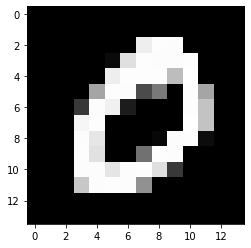

In [66]:
plt.imshow(out_buff.reshape(14,14),cmap="gray")
plt.show()